# Initial dataset creation
## 1. Parsing PhageScope entries

In [26]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from wordcloud import WordCloud


## Goal 1: load all Pseudomonas phages from the PhageScope database 
The overview downloaded from the PhageScope database contains all Pseudomonas phages with associated, such as taxonomy, hosts and genome annotation information. Size of the database: 15,098 Pseudomonas phages.

In [22]:
file_path = 'all_phage_meta_data.tsv'
df = pd.read_csv(file_path, delimiter='\t')
# Count the occurrences of each value in the 'Phage_source' column
phage_source_counts = df['Phage_source'].value_counts()

# Output the count of each value
print(phage_source_counts)

Phage_source
RefSeq     275
GPD        208
Genbank     92
EMBL        46
DDBJ         8
Name: count, dtype: int64


#### odd behaviour, missing sources such as gvd, mgv etc
we will now look at downloaded data from phage sources download, parse each file and select hosts of interest: repeat steps above and put it all in one dataset

In [61]:
file_path = 'phage_meta_data/chvd_phage_meta_data.tsv'
chvd = pd.read_csv(file_path, delimiter='\t')
filtered_chvd = chvd[chvd['Host'].str.contains('Pseudomonas', case=False, na=False)]

num_rows = len(filtered_chvd)
print(f'Number of rows with Pseudomonas hosts CHVD: {num_rows}')

filtered_chvd = filtered_chvd.drop(columns=['Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' ])
filtered_chvd.to_csv('chvd_filtered_pseudomonas_data.csv', index=False)

print("Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.")

Number of rows with Pseudomonas hosts CHVD: 77
Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.


In [8]:
file_path = 'phage_meta_data/ddbj_phage_meta_data.tsv'
ddbj = pd.read_csv(file_path, delimiter='\t')
filtered_ddbj = ddbj[ddbj['Host'].str.contains('Pseudomonas', case=False, na=False)]
filtered_ddbj.to_csv('ddbj_filtered_pseudomonas_data.csv', index=False)

filtered_ddbj.loc[:, 'Phage_source'] = 'DDBJ'

num_rows = len(filtered_ddbj)
print(f'Number of rows with Pseudomonas hosts ddbj: {num_rows}')

filtered_ddbj = filtered_ddbj.drop(columns=['Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' ])
filtered_ddbj.to_csv('ddbj_filtered_pseudomonas_data.csv', index=False)

print("Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.")

Number of rows with Pseudomonas hosts ddbj: 8
Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.


/tmp/ipykernel_2639953/3502247436.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ddbj.loc[:, 'Phage_source'] = 'DDBJ'


In [9]:
file_path = 'phage_meta_data/embl_phage_meta_data.tsv'
embl = pd.read_csv(file_path, delimiter='\t')
filtered_embl = embl[embl['Host'].str.contains('Pseudomonas', case=False, na=False)]

filtered_embl.loc[:, 'Phage_source'] = 'EMBL'


num_rows = len(filtered_embl)
print(f'Number of rows with Pseudomonas hosts embl: {num_rows}')

filtered_embl = filtered_embl.drop(columns=['Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' ])

print("Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.")
filtered_embl.to_csv('embl_filtered_pseudomonas_data.csv', index=False)


Number of rows with Pseudomonas hosts embl: 46
Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.


/tmp/ipykernel_2639953/2781569768.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_embl.loc[:, 'Phage_source'] = 'EMBL'


In [10]:
file_path = 'phage_meta_data/genbank_phage_meta_data.tsv'
genbank = pd.read_csv(file_path, delimiter='\t')
filtered_genbank = genbank[genbank['Host'].str.contains('Pseudomonas', case=False, na=False)]

filtered_genbank.loc[:, 'Phage_source'] = 'GENBANK'

num_rows = len(filtered_genbank)
print(f'Number of rows with Pseudomonas hosts genbank: {num_rows}')

filtered_genbank = filtered_genbank.drop(columns=['Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' ])

print("Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.")
filtered_genbank.to_csv('genbank_filtered_pseudomonas_data.csv', index=False)


Number of rows with Pseudomonas hosts genbank: 92
Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.


/tmp/ipykernel_2639953/3671408517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_genbank.loc[:, 'Phage_source'] = 'GENBANK'


In [66]:
file_path = 'phage_meta_data/gov2_phage_meta_data.tsv'
gov2 = pd.read_csv(file_path, delimiter='\t')
filtered_gov2 = gov2[gov2['Host'].str.contains('Pseudomonas', case=False, na=False)]

num_rows = len(filtered_gov2)
print(f'Number of rows with Pseudomonas hosts gov2: {num_rows}')

filtered_gov2 = filtered_gov2.drop(columns=['Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' ])

print("Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.")
filtered_gov2.to_csv('gov2_filtered_pseudomonas_data.csv', index=False)


Number of rows with Pseudomonas hosts gov2: 6625
Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.


In [11]:
file_path = 'phage_meta_data/gpd_phage_meta_data.tsv'
gpd = pd.read_csv(file_path, delimiter='\t')
filtered_gpd = gpd[gpd['Host'].str.contains('Pseudomonas', case=False, na=False)]

num_rows = len(filtered_gpd)
print(f'Number of rows with Pseudomonas hosts gpd: {num_rows}')

filtered_gpd.loc[:, 'Phage_source'] = 'GPD'

filtered_gpd = filtered_gpd.drop(columns=['Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' ])

print("Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.")
filtered_gpd.to_csv('gpd_filtered_pseudomonas_data.csv', index=False)


Number of rows with Pseudomonas hosts gpd: 468
Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.


/tmp/ipykernel_2639953/35378623.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gpd.loc[:, 'Phage_source'] = 'GPD'


In [12]:
file_path = 'phage_meta_data/gvd_phage_meta_data.tsv'
gvd = pd.read_csv(file_path, delimiter='\t')
filtered_gvd = gvd[gvd['Host'].str.contains('Pseudomonas', case=False, na=False)]

filtered_gvd.loc[:, 'Phage_source'] = 'GVD'

num_rows = len(filtered_gvd)
print(f'Number of rows with Pseudomonas hosts gvd: {num_rows}')

filtered_gvd = filtered_gvd.drop(columns=['Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' ])

print("Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.")
filtered_gvd.to_csv('gvd_filtered_pseudomonas_data.csv', index=False)


Number of rows with Pseudomonas hosts gvd: 365
Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.


/tmp/ipykernel_2639953/758571086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gvd.loc[:, 'Phage_source'] = 'GVD'


In [70]:
file_path = 'phage_meta_data/igvd_phage_meta_data.tsv'
igvd = pd.read_csv(file_path, delimiter='\t')
filtered_igvd = igvd[igvd['Host'].str.contains('Pseudomonas', case=False, na=False)]

num_rows = len(filtered_igvd)
print(f'Number of rows with Pseudomonas hosts igvd: {num_rows}')

filtered_igvd = filtered_igvd.drop(columns=['Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' ])

print("Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.")
filtered_igvd.to_csv('igvd_filtered_pseudomonas_data.csv', index=False)


Number of rows with Pseudomonas hosts igvd: 2
Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.


In [72]:
file_path = 'phage_meta_data/img_vr_phage_meta_data.tsv'
img_vr = pd.read_csv(file_path, delimiter='\t')
filtered_img_vr = img_vr[img_vr['Host'].str.contains('Pseudomonas', case=False, na=False)]

num_rows = len(filtered_img_vr)
print(f'Number of rows with Pseudomonas hosts img_vr: {num_rows}')

filtered_img_vr = filtered_img_vr.drop(columns=['Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' ])

print("Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.")
filtered_img_vr.to_csv('img_vr_filtered_pseudomonas_data.csv', index=False)


Number of rows with Pseudomonas hosts img_vr: 4970
Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.


In [14]:
file_path = 'phage_meta_data/mgv_phage_meta_data.tsv'
mgv = pd.read_csv(file_path, delimiter='\t')
filtered_mgv = mgv[mgv['Host'].str.contains('Pseudomonas', case=False, na=False)]

filtered_mgv.loc[:, 'Phage_source'] = 'MGV'

num_rows = len(filtered_mgv)
print(f'Number of rows with Pseudomonas hosts mgv: {num_rows}')

filtered_mgv = filtered_mgv.drop(columns=['Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' ])

print("Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.")
filtered_mgv.to_csv('mgv_filtered_pseudomonas_data.csv', index=False)


Number of rows with Pseudomonas hosts mgv: 411
Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.


/tmp/ipykernel_2639953/486701847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mgv.loc[:, 'Phage_source'] = 'MGV'


In [78]:
file_path = 'phage_meta_data/phagesdb_phage_meta_data.tsv'
phagesdb = pd.read_csv(file_path, delimiter='\t')
filtered_phagesdb = phagesdb[phagesdb['Host'].str.contains('Pseudomonas', case=False, na=False)]

num_rows = len(filtered_phagesdb)
print(f'Number of rows with Pseudomonas hosts phagesdb: {num_rows}')

filtered_phagesdb = filtered_phagesdb.drop(columns=['Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' ])

print("Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.")
filtered_phagesdb.to_csv('phagesdb_filtered_pseudomonas_data.csv', index=False)


Number of rows with Pseudomonas hosts phagesdb: 0
Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.


PhagesDB does not include any Pseudomonas phages 

In [15]:
file_path = 'phage_meta_data/refseq_phage_meta_data.tsv'
refseq = pd.read_csv(file_path, delimiter='\t')
filtered_refseq = refseq[refseq['Host'].str.contains('Pseudomonas', case=False, na=False)]

filtered_refseq.loc[:, 'Phage_source'] = 'REFSEQ'

num_rows = len(filtered_refseq)
print(f'Number of rows with Pseudomonas hosts refseq: {num_rows}')

filtered_refseq = filtered_refseq.drop(columns=['Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' ])

print("Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.")
filtered_refseq.to_csv('refseq_filtered_pseudomonas_data.csv', index=False)


Number of rows with Pseudomonas hosts refseq: 275
Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.


/tmp/ipykernel_2639953/4101026812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_refseq.loc[:, 'Phage_source'] = 'REFSEQ'


In [81]:
file_path = 'phage_meta_data/stv_phage_meta_data.tsv'
stv = pd.read_csv(file_path, delimiter='\t')
filtered_stv = stv[stv['Host'].str.contains('Pseudomonas', case=False, na=False)]

num_rows = len(filtered_stv)
print(f'Number of rows with Pseudomonas hosts stv: {num_rows}')

filtered_stv = filtered_stv.drop(columns=['Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' ])

print("Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.")
filtered_stv.to_csv('stv_filtered_pseudomonas_data.csv', index=False)


Number of rows with Pseudomonas hosts stv: 648
Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.


In [16]:
file_path = 'phage_meta_data/temphd_phage_meta_data.tsv'
temphd = pd.read_csv(file_path, delimiter='\t')
filtered_temphd = temphd[temphd['Host'].str.contains('Pseudomonas', case=False, na=False)]

filtered_temphd.loc[:, 'Phage_source'] = 'TEMPHD'

num_rows = len(filtered_temphd)
print(f'Number of rows with Pseudomonas hosts temphd: {num_rows}')

filtered_temphd = filtered_temphd.drop(columns=['Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' ])

print("Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.")
filtered_temphd.to_csv('temphd_filtered_pseudomonas_data.csv', index=False)


Number of rows with Pseudomonas hosts temphd: 1111
Columns 'Length', 'GC_content', 'Taxonomy', 'Completeness','Cluster', 'Subcluster' have been removed.


/tmp/ipykernel_2639953/651092963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_temphd.loc[:, 'Phage_source'] = 'TEMPHD'


Combine all *_filtered_pseudomonas_data.csv

In [17]:
csv_files = [
    'chvd_filtered_pseudomonas_data.csv',
    'ddbj_filtered_pseudomonas_data.csv',
    'embl_filtered_pseudomonas_data.csv',
    'genbank_filtered_pseudomonas_data.csv',
    'gov2_filtered_pseudomonas_data.csv',
    'gpd_filtered_pseudomonas_data.csv',
    'gvd_filtered_pseudomonas_data.csv',
    'igvd_filtered_pseudomonas_data.csv',
    'img_vr_filtered_pseudomonas_data.csv',
    'mgv_filtered_pseudomonas_data.csv',
    'refseq_filtered_pseudomonas_data.csv',
    'stv_filtered_pseudomonas_data.csv',
    'temphd_filtered_pseudomonas_data.csv'
]

combined_df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

combined_df.to_csv('combined_filtered_pseudomonas_data.csv', index=False)

num_rows = len(combined_df)
print(f'Number of rows in the combined dataset: {num_rows}')

Number of rows in the combined dataset: 15098


In [ ]:
# BEFORE FILTERING BASED ON NAME
data =  pd.read_csv('combined_filtered_pseudomonas_data.csv')
# Count of different hosts
host_counts = data['Host'].value_counts()

# Lifestyle distribution
lifestyle_counts = data['Lifestyle'].value_counts(normalize=True) * 100

# Plotting
top_host_counts = host_counts.sort_values(ascending=False).head(10)
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Host distribution for top 10 hosts
axes[0].bar(top_host_counts.index, top_host_counts.values, color='skyblue')
axes[0].set_title('Distribution of Top 10 Hosts')
axes[0].set_xlabel('Host Type')
axes[0].set_ylabel('Counts')
axes[0].tick_params(axis='x', rotation=60)  


# Lifestyle distribution
axes[2].pie(lifestyle_counts, labels=lifestyle_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'orange'])
axes[2].set_title('Lifestyle Distribution')

plt.tight_layout()
plt.show()




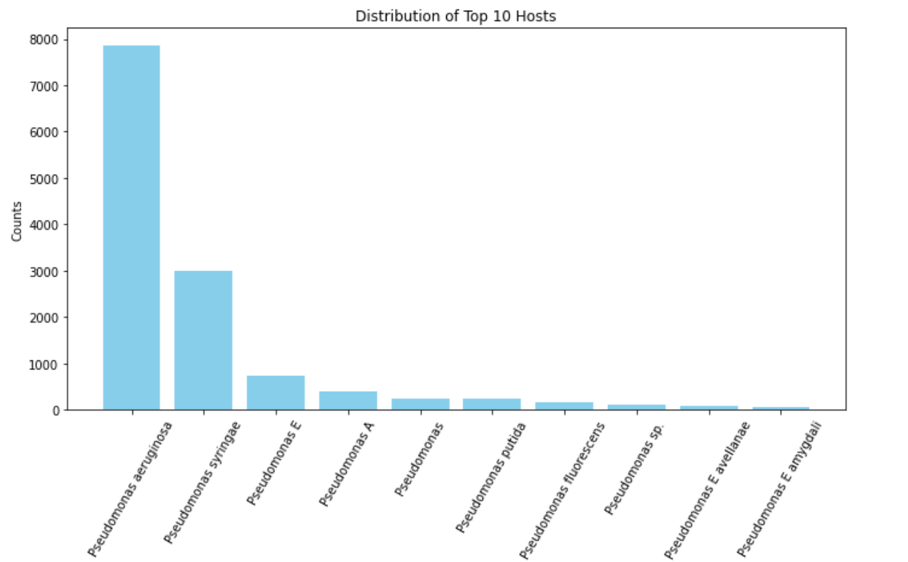
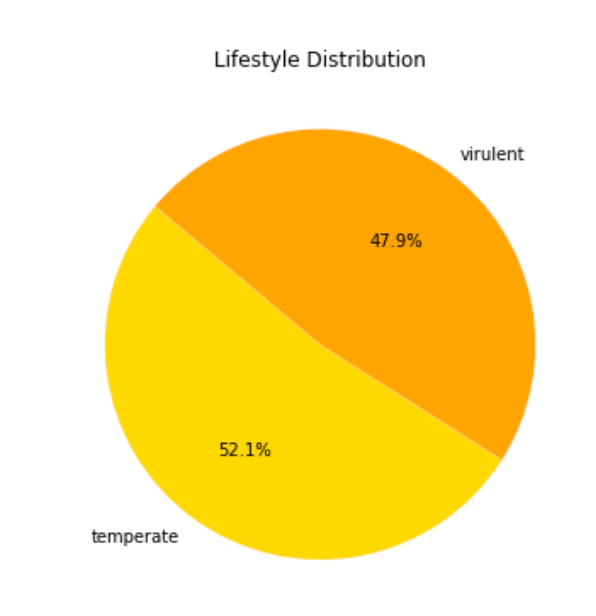

In [15]:
host_df =  pd.read_csv('combined_filtered_pseudomonas_data.csv')
# Unique hosts
unique_hosts = host_df['Host'].nunique()
# How many phages are associated with each host
host_distribution = host_df['Host'].value_counts()
unique_hosts, host_distribution.head(10)

(459,
 Host
 Pseudomonas aeruginosa     7845
 Pseudomonas syringae       2989
 Pseudomonas E               733
 Pseudomonas A               398
 Pseudomonas                 254
 Pseudomonas putida          233
 Pseudomonas fluorescens     172
 Pseudomonas sp.             109
 Pseudomonas E avellanae      77
 Pseudomonas E amygdali       57
 Name: count, dtype: int64)

In [24]:
# Host distributuon normalisation to broader terms - if labelled as Pseudomonas A, change Pseudomonas, etc
cleaned_hosts = host_df['Host'].copy()

# Step 1: Replace generic letter codes (e.g., "Pseudomonas E") with "Pseudomonas"
cleaned_hosts = cleaned_hosts.str.replace(r'^Pseudomonas [A-Z]$', 'Pseudomonas', regex=True)

# Step 2: Replace lettered species (e.g., "Pseudomonas E amygdali") with "Pseudomonas amygdali"
cleaned_hosts = cleaned_hosts.str.replace(r'^Pseudomonas [A-Z] (.+)$', r'Pseudomonas \1', regex=True)

# Step 3: Replace "Pseudomonas sp." with "Pseudomonas"
cleaned_hosts = cleaned_hosts.str.replace(r'^Pseudomonas sp\.$', 'Pseudomonas', regex=True)

# Step 4: Merge "Pseudomonas <species> <letter>" into "Pseudomonas <species>"
cleaned_hosts = cleaned_hosts.str.replace(r'^(Pseudomonas \w+)[ ]+[A-Z]$', r'\1', regex=True)

# Step 4: Merge "Pseudomonas <species> <letter>" into "Pseudomonas <species>"
cleaned_hosts = cleaned_hosts.str.replace(r'^(Pseudomonas \w+)[ ]+[A-Z]$', r'\1', regex=True)

# Step 5: Replace specific ID-like names such as "Pseudomonas sp001655615" with "Pseudomonas"
cleaned_hosts = cleaned_hosts.str.replace(r'^Pseudomonas sp\d+$', 'Pseudomonas', regex=True)

cleaned_hosts = cleaned_hosts.str.replace(r'^(Pseudomonas \w+)[ ]+[A-Z]{2,}$', r'\1', regex=True)


# Update the dataframe with the cleaned host names
host_df['Cleaned_Host'] = cleaned_hosts

# Display the unique cleaned hosts and the most common ones
cleaned_distribution = host_df['Cleaned_Host'].value_counts()
cleaned_distribution.head(211)



Cleaned_Host
Pseudomonas aeruginosa                                         7864
Pseudomonas syringae                                           3059
Pseudomonas                                                    1952
Pseudomonas fluorescens                                         350
Pseudomonas putida                                              343
                                                               ... 
Pseudomonas sp. LAMO17WK12:I5;Pseudomonas sp. LAMO17WK12:I6       1
Thiopseudomonas sp.                                               1
Pseudomonas sichuanensis                                          1
Pseudomonas jinjuensis                                            1
Pseudomonas psychrotolerans                                       1
Name: count, Length: 211, dtype: int64

In [23]:
num_unique_cleaned_hosts = host_df['Cleaned_Host'].nunique()
num_unique_cleaned_hosts

211

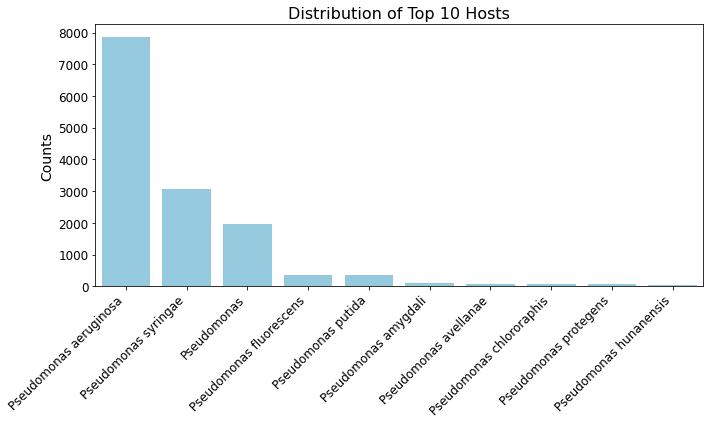

In [27]:
# AFTER FILTERING BASED ON HOST NAME plotting
# Bar plot of the top 10 most common cleaned hosts (similar to uploaded example)

plt.figure(figsize=(10, 6))
top10_hosts = cleaned_distribution.head(10)
sns.barplot(x=top10_hosts.index, y=top10_hosts.values, color='skyblue')

# Formatting
plt.title('Distribution of Top 10 Hosts', fontsize=16)
plt.xlabel('')
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()





In [ ]:
# Host distribution based on sources - exploded pie chart
categories = ['RefSeq', 'Genbank', 'EMBL', 'DDBJ', 'CHVD', 'Gov2', 'GPD', 'GVD', 'IGVD', 'IMG_VR', 'MGV', 'STV', 'TemPhD']
values = [275, 92, 46, 8, 77, 6625, 468, 365, 2, 4970, 411, 648, 1111]

explode = [0.1 if i < 5 else 0 for i in range(len(values))]  
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(values, labels=categories, explode=explode, autopct='%1.1f%%', startangle=90, counterclock=False)
ax.axis('equal')

plt.setp(texts, size=10)
plt.setp(autotexts, size=8, weight="bold")

plt.title('Distribution of Phages from the from the Different Sources')

ax.legend(wedges, categories, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

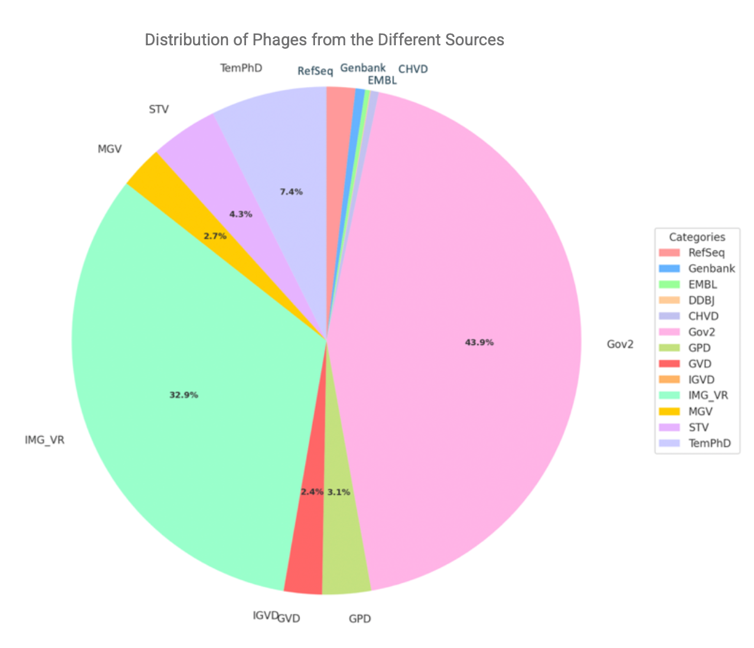

## Goal 2: Annotated proteins of the phages

Downloading all protein entries from PhageScope annotated protein list database and sources to merge with 

In [ ]:
# Merge all associated protein data

# TSV files to be merged
tsv_files = [
    'annotated_protein_metadata/embl_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/genbank_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/stv_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/refseq_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/ddbj_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/phagesdb_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/gvd_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/gpd_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/mgv_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/temphd_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/chvd_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/igvd_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/img_vr_phage_annotated_protein_meta_data.tsv',
    'annotated_protein_metadata/gov2_phage_annotated_protein_meta_data.tsv'
]

for tsv_file in tsv_files:
    new_tsv_df = pd.read_csv(tsv_file, delimiter='\t')
    new_tsv_selected = new_tsv_df[['Phage_ID', 'Protein_ID', 'Product', 'Protein_classification']]
    host_df = pd.concat([host_df, new_tsv_selected], ignore_index=True)

# Forward-fill the host, taxonomy, and lifestyle columns based on Phage_ID
host_df[['host', 'taxonomy', 'lifestyle']] = host_df.groupby('Phage_ID')[['host', 'taxonomy', 'lifestyle']].ffill().bfill()

# Sort by Phage_ID 
host_df = host_df.sort_values(by='Phage_ID').reset_index(drop=True)

host_df.to_csv('final_annotated_protein.csv', index=False)

In [15]:
num_rows = len(host_df)
print(f'Number of rows in the combined dataset: {num_rows}')

Number of rows in the combined dataset: 89750


In [16]:
df_cleaned = host_df.dropna()
df_cleaned.to_csv('cleaned_phage_data.csv', index=False)
print(f"Number of rows after removing missing values: {len(df_cleaned)}")

Number of rows after removing missing values: 77109


In [5]:
# Number of proteins per phage 
df = pd.read_csv('cleaned_phage_data.csv')
protein_count_per_phage = df.groupby('Phage_ID')['Protein_ID'].count()
print("Number of proteins per phage:")
print(protein_count_per_phage)
average_protein_count = protein_count_per_phage.mean()
print("Average number of proteins per phage:")
print(average_protein_count)

Number of proteins per phage:
Phage_ID
AB008550.1      47
AB472900.2     158
AB560486.1      88
AF165214.2      99
AF226851.1       7
              ... 
biochar_999     44
ivig_2819       64
ivig_2820       25
ivig_3015       74
ivig_3143       68
Name: Protein_ID, Length: 2046, dtype: int64
Average number of proteins per phage:
37.68768328445748


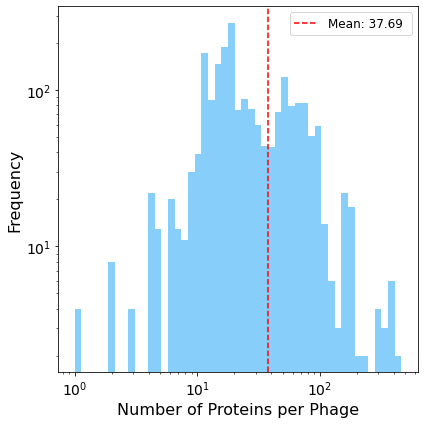

In [10]:
plt.figure(figsize=(6, 6))
bins = np.logspace(np.log10(protein_count_per_phage.min()), np.log10(protein_count_per_phage.max()), 50)
plt.hist(protein_count_per_phage, bins=bins, color='lightskyblue', edgecolor='none')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Number of Proteins per Phage', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.axvline(average_protein_count, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {average_protein_count:.2f} ')
plt.legend(fontsize=12, loc='upper right')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.tight_layout()

plt.show()


In [ ]:
# add length column
df['Length'] = (((df['Stop'] + 1 - df['Start']) / 3) + 1).astype(int)
df[['Protein_ID', 'Start', 'Stop', 'Length']].head()

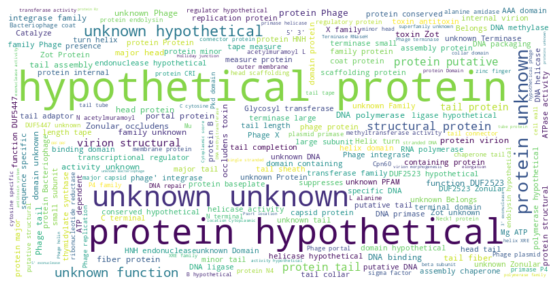

In [4]:
# Word cloud
products_text = ' '.join(df['Product'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(products_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

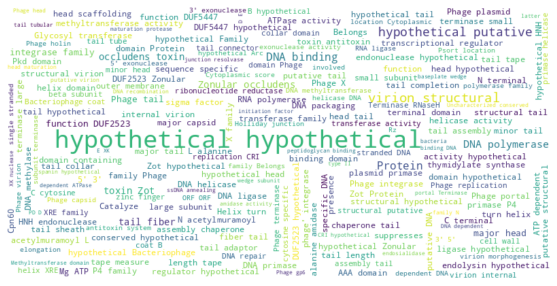

In [8]:
# WordCloud without "unknown" and "protein"
products_text = ' '.join(df['Product'].dropna().replace(["unknown", "protein"], "", regex=True).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(products_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

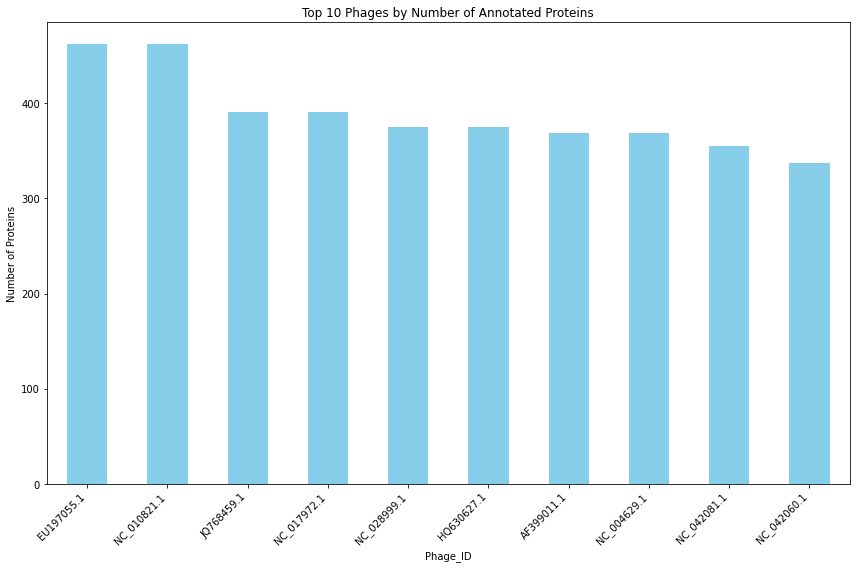

In [22]:
# Top 10
top_10_protein_count = protein_count_per_phage.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
top_10_protein_count.plot(kind='bar', color='skyblue')
plt.title('Top 10 Phages by Number of Annotated Proteins')
plt.xlabel('Phage_ID')
plt.ylabel('Number of Proteins')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [4]:
products_per_phage = df.groupby('Phage_ID')['Product'].apply(list)
print(products_per_phage)

Phage_ID
AB008550.1     [cytotoxin, BAA36227.1, BAA36228.1, BAA36229.1...
AB472900.2     [hypothetical protein, hypothetical protein, s...
AB560486.1     [puative terminase, hypothetical protein, hypo...
AF165214.2     [terminase small subunit, terminase large subu...
AF226851.1                       [P14, PHa, PHb, P2, P4, P1, P7]
                                     ...                        
biochar_999    [unknown, unknown, FR47-like protein, unknown,...
ivig_2819      [Phage integrase family, Domain of unknown fun...
ivig_2820      [Cro/C1-type HTH DNA-binding domain, unknown, ...
ivig_3015      [Transposase, hypothetical protein, unknown, P...
ivig_3143      [pyocin R, lytic enzyme, Protein of unknown fu...
Name: Product, Length: 2046, dtype: object


In [5]:
# Number of unique functions
total_unique_functions = pd.Series(df['Product'].dropna().unique())
total_number_of_functions = len(total_unique_functions)
print("\nTotal number of unique annotated functions across all phages:")
print(total_number_of_functions)


Total number of unique annotated functions across all phages:
4287


In [10]:
# Check for unknown annotations
pattern = r'\b(unknown|unknwon|unkown|unknow)\b'
unknown_products_df2 = df[df['Product'].str.contains(pattern, case=False, na=False, regex=True)]
number_of_unknown_rows2 = unknown_products_df2.shape[0]

print(f"Number of rows with 'unknown' in Product: {number_of_unknown_rows2}")
unknown_products_df2.to_csv('unknown_and_typo_products_dataset.csv', index=False)

#22 204 when taking into account various types of typos 

Number of rows with 'unknown' in Product: 22204


/tmp/ipykernel_3110007/31443757.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  unknown_products_df2 = df[df['Product'].str.contains(pattern, case=False, na=False, regex=True)]


In [2]:
# Check for hypothetical
pattern = r'\b(hypothtical|hypothetical)\b'
hypothetical_products_df2 = df[df['Product'].str.contains(pattern, case=False, na=False, regex=True)]
number_of_hypothetical_rows2 = hypothetical_products_df2.shape[0]

print(f"Number of rows with 'hypothetical' in Product: {number_of_hypothetical_rows2}")
hypothetical_products_df2.to_csv('hypothetical_products_dataset.csv', index=False)

Number of rows with 'hypothetical' in Product: 25810


/tmp/ipykernel_2982251/576901438.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  hypothetical_products_df2 = df[df['Product'].str.contains(pattern, case=False, na=False, regex=True)]


Find the lenghts of each sequence with the following formula:
((STOP + 1 - START) / 3 ) - 1


In [ ]:
unknown = pd.read_csv("unknown_and_typo_products_dataset.csv")

# Calculate the 'Length' column as (Stop - Start) / 3 + 1
unknown['Length'] = (((unknown['Stop'] + 1 - unknown['Start']) / 3) + 1)

# Drop the 'Start' and 'Stop' columns
unknown = unknown.drop(columns=['Start', 'Stop'])

# Save the final DataFrame to a new CSV file
unknown.to_csv('Final_Phage_and_Protein_Dataset.csv', index=False)